# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to simulate what you will face when you are out in the wild. 

Happy Coding!

In [464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')
air_bnb.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [453]:
# How many neighbourhood groups / which shows up the most
# air_bnb['neighbourhood_group']
# air_bnb['neighbourhood_group'].unique() = 5
air_bnb.value_counts('neighbourhood_group').nlargest(1)

neighbourhood_group
Manhattan    21661
dtype: int64

In [455]:
# Are private rooms the most popular in Manhattan?
# air_bnb['room_type'].unique()
air_bnb.value_counts('room_type')

# Entire home/apt most popular

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

In [128]:
# Who are the top 10 busiest hosts based on number of reviews per month?
# air_bnb.describe()
# air_bnb.sort_values(['number_of_reviews', 'host_id'], ascending=False).head(100)
# air_bnb['host_id'].unique()
# air_bnb[(air_bnb['host_id'].unique()) & (air_bnb.sort_values(['number_of_reviews'], ascending=False).head(10))]
# new_col = air_bnb[['host_id','number_of_reviews']].set_index('host_id')


air_bnb[['host_id', 'host_name', 'number_of_reviews']].nlargest(10, 'number_of_reviews', keep='last')


,host_id,host_name,number_of_reviews
11759,47621202,Dona,629
2031,4734398,Jj,607
2030,4734398,Jj,597
2015,4734398,Jj,594
13495,47621202,Dona,576
10623,37312959,Maya,543
1879,2369681,Carol,540
20403,26432133,Danielle,510
4870,12949460,Asa,488
471,792159,Wanda,480


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

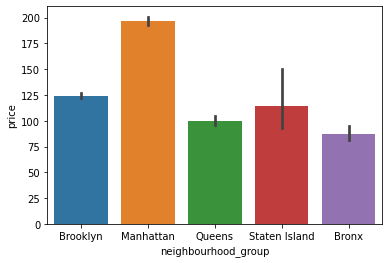

In [535]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart
# air_bnb[['price','neighbourhood_group']]
# air_bnb[(air_bnb['price'].mean()) & (air_bnb['neighbourhood_group'])]
# air_bnb[['neighbourhood_group','price']]
# air_bnb['neighbourhood_group'].value_counts()


avg_price = round(air_bnb[['neighbourhood_group','price']].groupby('neighbourhood_group').mean())
# air_bnb[['neighbourhood_group','price']].groupby('neighbourhood_group').mean().nlargest(1, 'price')

# ycat= air_bnb['neighbourhood_group']
# xcat= air_bnb[['neighbourhood_group','price']].groupby('neighbourhood_group').mean()
sns.barplot(data=avg_price,x=air_bnb['neighbourhood_group'], y=air_bnb['price'])


In [206]:
# What is the most expensive neighbourhood in each neighbourhood_group
# air_bnb[['neighbourhood', 'price']].max()
air_bnb[['neighbourhood_group', 'neighbourhood', 'price']].groupby('neighbourhood_group').max()

,neighbourhood,price
neighbourhood_group,,
Bronx,Woodlawn,2500
Brooklyn,Windsor Terrace,10000
Manhattan,West Village,10000
Queens,Woodside,10000
Staten Island,Woodrow,5000


In [243]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
# air_bnb[['host_name','minimum_nights','price']]
air_bnb[['host_name','minimum_nights','price']].nlargest(10, ['price'], keep='last').sort_values('minimum_nights').head(1)
# (air_bnb['minimum_nights'] == 1)
# (air_bnb['price'].max())
# options = [1]
# air_bnb['minimum_nights'].isin(options)
# air_bnb[(air_bnb['price'].max()) & (air_bnb['minimum_nights']==1)]

,host_name,minimum_nights,price
4377,Jessica,1,8000


In [463]:
# Who has no (zero) availability with a review count of 100 or more
air_bnb[(air_bnb['availability_365']== 0)& (air_bnb['number_of_reviews'] > 100)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20,1.86,1,0
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.06,1,0
180,45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,2019-06-30,1.92,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29581,22705516,The Quietest Block in Manhattan :),127740507,Kathleen,Manhattan,Harlem,40.83102,-73.94181,Private room,65,2,103,2019-07-07,5.89,2,0
30461,23574142,queens get away!!,176185168,Janet,Queens,Laurelton,40.68209,-73.73662,Private room,65,1,119,2018-12-24,7.79,1,0
31250,24267706,entire sunshine of the spotless mind room,21074914,Albert,Brooklyn,Bedford-Stuyvesant,40.68234,-73.91318,Private room,49,1,102,2019-07-05,6.73,3,0
32670,25719044,COZY Room for Female Guests,40119874,Stephany,Brooklyn,Prospect-Lefferts Gardens,40.66242,-73.94417,Private room,48,1,131,2019-05-31,9.97,2,0


In [260]:
# If each host rents all of their properties for the night, which 5 make the most that night?
air_bnb[['host_name','price']].groupby('host_name').sum().sort_values('price', ascending=False).head(5)

,price
host_name,
Sonder (NYC),82795
Blueground,70331
Michael,66895
David,65844
Alex,52563


In [277]:
# When did Danielle from Queens last receive a review?
one_host = air_bnb[(air_bnb['host_name'] =='Danielle') &(air_bnb['neighbourhood_group'] == 'Queens')]
one_host['last_review'].sort_values().head(1)

27021    2018-01-02
Name: last_review, dtype: object

In [342]:
air_bnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [584]:
# bar chart showing the number of room types in the Bronx

# # air_bnb[['neighbourhood_group','room_type']][(air_bnb['neighbourhood_group']== 'Bronx') &(air_bnb['room_type'])]

# air_bnb[['neighbourhood_group','room_type','count_rooms']][(air_bnb['neighbourhood_group']== 'Bronx') &(air_bnb['room_type'])].set_index('room_type').groupby('room_type').head()                                                                                                                                                         
# air_bnb.groupby([['neighbourhood_group','room_type']]).count()[(air_bnb['neighbourhood_group']== 'Bronx') &(air_bnb['room_type'])].set_index('room_type')

count_rooms = air_bnb[['neighbourhood_group', 'room_type']]
bronx_rooms = count_rooms.groupby(['neighbourhood_group', 'room_type'])['room_type'].count()
bronx_rooms


# air_bnb[['neighbourhood_group', 'room_type']].groupby(['neighbourhood_group', 'room_type'])['room_type'].count()
#

# bronx = air_bnb['neighbourhood_group'] == 'Bronx'
# air_bnb[(air_bnb['neighbourhood_group'] == 'Bronx') & (air_bnb['room_type'])].groupby(['neighbourhood_group', 'room_type'])['room_type'].count()
sns.barplot(data=air_bnb['room_type'], x=air_bnb['neighbourhood_group'], y=air_bnb['room_type'].count())        


AttributeError: 'bool' object has no attribute 'all'

In [434]:
air_bnb = air_bnb.drop("room_type_count", axis=1)

In [416]:
air_bnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [ ]:
1. air_bnb.value_counts('neighbourhood_group').nlargest(1)   #Manhattan
2. air_bnb.value_counts('room_type') #no. Entire home is
3. air_bnb[['host_id', 'host_name', 'number_of_reviews']].nlargest(10, 'number_of_reviews', keep='last')
# I worked on number three for awhile thinking you wanted unique top but it looks like maybe you just wanted to top ten busiest

4.
air_bnb[['neighbourhood_group','price']].groupby('neighbourhood_group').mean()
air_bnb[['neighbourhood_group','price']].groupby('neighbourhood_group').mean().nlargest(1, 'price')
avg_price = round(air_bnb[['neighbourhood_group','price']].groupby('neighbourhood_group').mean())
sns.barplot(data=avg_price,x=air_bnb['neighbourhood_group'], y=air_bnb['price'])


5. air_bnb[['neighbourhood_group', 'neighbourhood', 'price']].groupby('neighbourhood_group').max()


 	neighbourhood 	price
neighbourhood_group 		
Bronx 	Woodlawn 	2500
Brooklyn 	Windsor Terrace 	10000
Manhattan 	West Village 	10000
Queens 	Woodside 	10000
Staten Island 	Woodrow 	5000


6.air_bnb[['host_name','minimum_nights','price']].nlargest(10, ['price'], keep='last').sort_values('minimum_nights').head(1)
 	host_name 	minimum_nights 	price
4377 	Jessica 	1 	8000



7.  air_bnb[(air_bnb['availability_365']== 0)& (air_bnb['number_of_reviews'] > 100)]  
# 158 rows

8.air_bnb[['host_name','price']].groupby('host_name').sum().sort_values('price', ascending=False).head(5)
 	price
host_name 	
Sonder (NYC) 	82795
Blueground 	70331
Michael 	66895
David 	65844
Alex 	52563

9. one_host = air_bnb[(air_bnb['host_name'] =='Danielle') &(air_bnb['neighbourhood_group'] == 'Queens')]
one_host['last_review'].sort_values().head(1)

27021    2018-01-02
Name: last_review, dtype: object
        
# 10. count_rooms = air_bnb[['neighbourhood_group', 'room_type']]
# count_rooms.groupby(['neighbourhood_group', 'room_type'])['room_type'].count().head(3)
air_bnb[(air_bnb['neighbourhood_group'] == 'Bronx') & (air_bnb['room_type'])].groupby(['neighbourhood_group', 'room_type'])['room_type'].count()
sns.barplot(data=air_bnb['room_type'], x=air_bnb['neighbourhood_group'], y=air_bnb['room_type'].count())   